<a href="https://colab.research.google.com/github/Mahaamimiii/Credit_Card_Fraud_Analysis/blob/main/Cred_Card_Fraudipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/card_transdata.csv")
df.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df['fraud'].value_counts()
df['fraud'].value_counts(normalize=True)*100

,proportion
fraud,
0.0,91.2597
1.0,8.7403


In [7]:
target = 'fraud'

category = ['repeat_retailer','used_chip','used_pin_number']

numeric = [col for col in df.columns
           if col not in category + [target]]

I separated the dataset into target, categorical, and numerical features to apply appropriate preprocessing and avoid data leakage.

Text(0.5, 1.0, 'Fraud vs Non-Fraud Transactions')

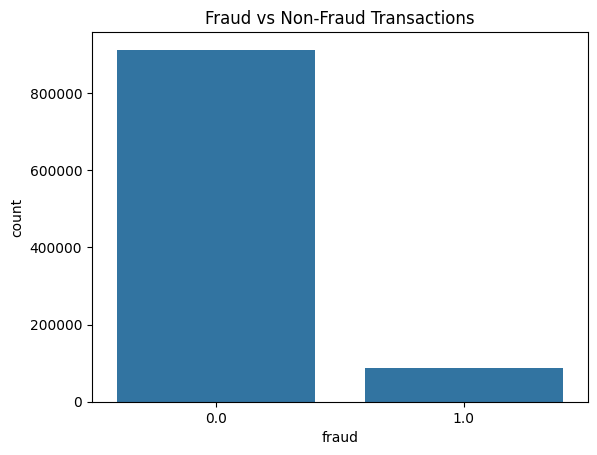

In [8]:
sns.countplot(x='fraud',data=df)
plt.title("Fraud vs Non-Fraud Transactions")

5. Distribution of Key variables

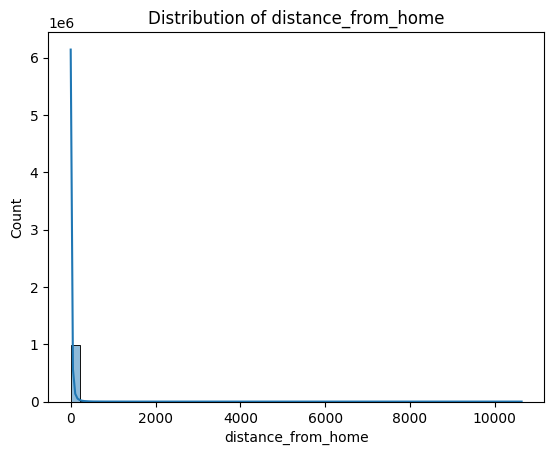

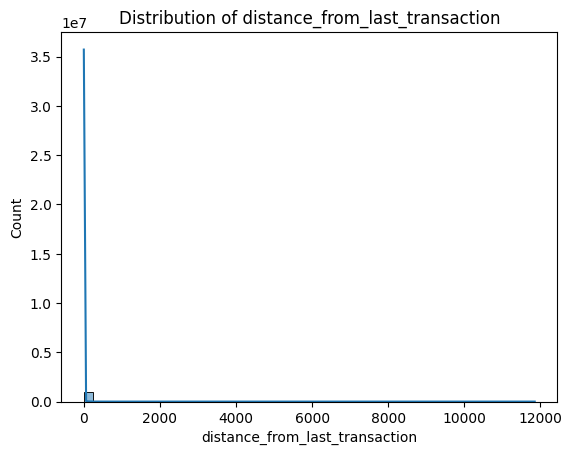

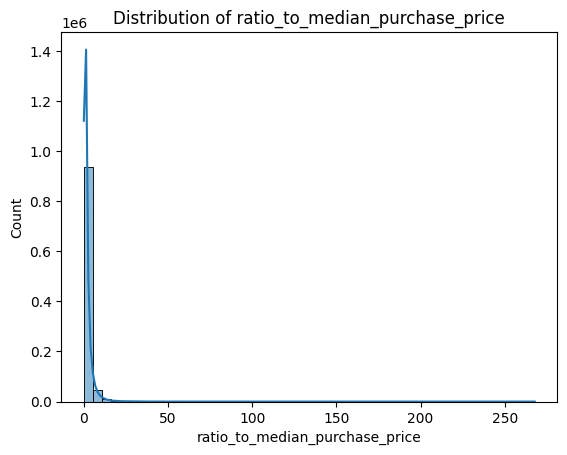

In [9]:
cont_cols= [
    'distance_from_home',
    'distance_from_last_transaction',
    'ratio_to_median_purchase_price'
]
for col in cont_cols:
  sns.histplot(df[col], bins=50,kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

6. Binning Columns - Distance from home

In [10]:
min_dist = df['distance_from_home'].min()
max_dist = df['distance_from_home'].max()

In [12]:
bins = [
    min_dist, 5, 15, 20, 30, 40, 50, 75, 100, 200, 500, max_dist
]

df['distance_bin_custom'] = pd.cut(
    df['distance_from_home'],
    bins=bins,
    include_lowest=True
)

In [13]:
df['distance_bin_custom'].value_counts().sort_index()

,count
distance_bin_custom,
"(0.00387, 5.0]",311210
"(5.0, 15.0]",302865
"(15.0, 20.0]",75578
"(20.0, 30.0]",93678
"(30.0, 40.0]",55607
"(40.0, 50.0]",35738
"(50.0, 75.0]",50231
"(75.0, 100.0]",25304
"(100.0, 200.0]",33508


7. Relationship with Fraud

In [14]:
df.groupby('distance_bin_custom')['fraud'].agg(['count', 'mean'])


/tmp/ipython-input-3066428873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('distance_bin_custom')['fraud'].agg(['count', 'mean'])


,count,mean
distance_bin_custom,,
"(0.00387, 5.0]",311210,0.074811
"(5.0, 15.0]",302865,0.065742
"(15.0, 20.0]",75578,0.065032
"(20.0, 30.0]",93678,0.065053
"(30.0, 40.0]",55607,0.066664
"(40.0, 50.0]",35738,0.065896
"(50.0, 75.0]",50231,0.065935
"(75.0, 100.0]",25304,0.064021
"(100.0, 200.0]",33508,0.446968


Analysis Focus: Distance from home vs fraud

Most transactions occur close to the cardholder’s home.

Fraud rates are relatively stable at lower distances.

Transactions far from home show a significant spike in fraud probability.

Key Takeaway:
Unusually distant transactions represent high-risk events and should be prioritized in fraud detection systems.

8. Binning columns - distance from last transaction

In [15]:
df['distance_from_last_transaction'].describe()

,distance_from_last_transaction
count,1000000.000000
mean,5.036519
std,25.843093
min,0.000118
25%,0.296671
50%,0.998650
75%,3.355748
max,11851.104565


In [16]:
bins = [0, 1, 5, 10, 20, 50, 100, np.inf]
labels = ['0–1', '1–5', '5–10', '10–20', '20–50', '50–100', '100+']

df['distance_from_last_transaction_bin'] = pd.cut(
    df['distance_from_last_transaction'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

10. Relationship with Fraud

In [17]:
df.groupby('distance_from_last_transaction_bin')['fraud'].agg(['count', 'mean'])

/tmp/ipython-input-1435790978.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('distance_from_last_transaction_bin')['fraud'].agg(['count', 'mean'])


,count,mean
distance_from_last_transaction_bin,,
0–1,500294,0.081904
1–5,314816,0.081308
5–10,84803,0.079679
10–20,52485,0.082176
20–50,32768,0.080566
50–100,9574,0.478588
100+,5260,0.482510


Analysis Focus: Distance from Last Transaction vs Fraud

Most transactions occur at locations close to the previous transaction.

Fraud rates remain relatively stable for small distance gaps between transactions.

A sharp increase in fraud probability is observed when the distance from the last transaction becomes very large.

Key Takeaway:
Transactions that occur far from the previous transaction location indicate abnormal behavior and carry a significantly higher risk of fraud, making transaction-to-transaction distance a strong fraud indicator.

11. Binning Columns - ratio_to_median_purchase_price

In [18]:
df['ratio_to_median_purchase_price'].describe()

,ratio_to_median_purchase_price
count,1000000.000000
mean,1.824182
std,2.799589
min,0.004399
25%,0.475673
50%,0.997717
75%,2.096370
max,267.802942


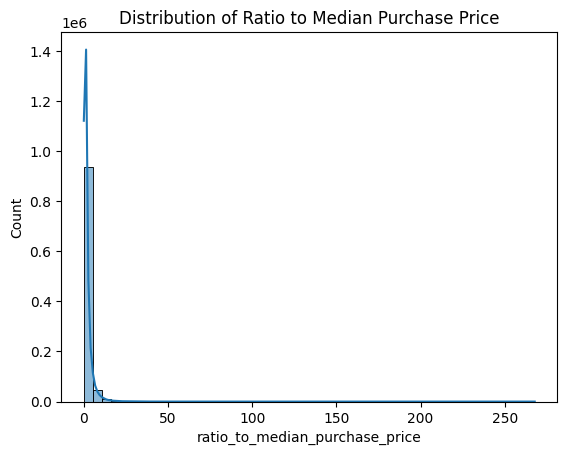

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['ratio_to_median_purchase_price'], bins=50, kde=True)
plt.title("Distribution of Ratio to Median Purchase Price")
plt.show()

In [20]:
import numpy as np

bins_ratio = [0, 0.5, 1, 2, 5, np.inf]
labels_ratio = [
    "<0.5",
    "0.5–1",
    "1–2",
    "2–5",
    "5+"
]


In [21]:
df['ratio_to_median_purchase_price_bin'] = pd.cut(
    df['ratio_to_median_purchase_price'],
    bins=bins_ratio,
    labels=labels_ratio,
    include_lowest=True
)

In [22]:
df['ratio_to_median_purchase_price_bin'].value_counts().sort_index()

,count
ratio_to_median_purchase_price_bin,
<0.5,264451
0.5–1,236428
1–2,235378
2–5,192503
5+,71240


12. Relationship with target Fraud

In [23]:
df.groupby('ratio_to_median_purchase_price_bin')['fraud'].agg(['count', 'mean'])

/tmp/ipython-input-2297136740.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('ratio_to_median_purchase_price_bin')['fraud'].agg(['count', 'mean'])


,count,mean
ratio_to_median_purchase_price_bin,,
<0.5,264451,0.025131
0.5–1,236428,0.025044
1–2,235378,0.024849
2–5,192503,0.125614
5+,71240,0.628944


Analysis Focus: Ratio to Median Purchase Price vs Fraud

The distribution of purchase deviation is highly right-skewed, with most transactions clustered around normal spending behavior.

Transactions within typical spending ranges show consistently low fraud rates.

Fraud probability increases sharply as transaction amounts significantly exceed the customer’s usual spending level.

Key Takeaway:
Large deviations from a customer’s normal spending behavior are strong indicators of fraudulent activity, making purchase amount deviation a critical fraud detection feature.

In [24]:
df['used_chip'].value_counts()

,count
used_chip,
0.0,649601
1.0,350399


In [25]:
df.groupby('used_chip')['fraud'].agg(['count', 'mean'])

,count,mean
used_chip,,
0.0,649601,0.100051
1.0,350399,0.063956


Transactions where chip authentication is used exhibit a significantly lower fraud rate compared to non-chip transactions, indicating chip-based payments as a strong fraud-reducing factor.

In [26]:
df['used_pin_number'].value_counts()
df.groupby('used_pin_number')['fraud'].agg(['count', 'mean'])

,count,mean
used_pin_number,,
0.0,899392,0.096877
1.0,100608,0.002714


PIN adds an extra authentication layer → should reduce fraud.

In [27]:
df['online_order'].value_counts()
df.groupby('online_order')['fraud'].agg(['count', 'mean'])

,count,mean
online_order,,
0.0,349448,0.013427
1.0,650552,0.127140



Online transactions lack physical verification → higher fraud risk.

In [28]:
df['repeat_retailer'].value_counts()
df.groupby('repeat_retailer')['fraud'].agg(['count', 'mean'])

,count,mean
repeat_retailer,,
0.0,118464,0.088449
1.0,881536,0.087262


Repeat Retailer vs Fraud — EDA Insight

Analysis of repeat retailer behavior shows minimal difference in fraud rates between repeat and non-repeat merchants. This suggests that merchant familiarity alone does not significantly influence fraud occurrence in the dataset.

In [29]:
corr = df[
    [
        'distance_from_home',
        'distance_from_last_transaction',
        'ratio_to_median_purchase_price',
        'fraud'
    ]
].corr()

corr

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.462305
fraud,0.187571,0.091917,0.462305,1.000000


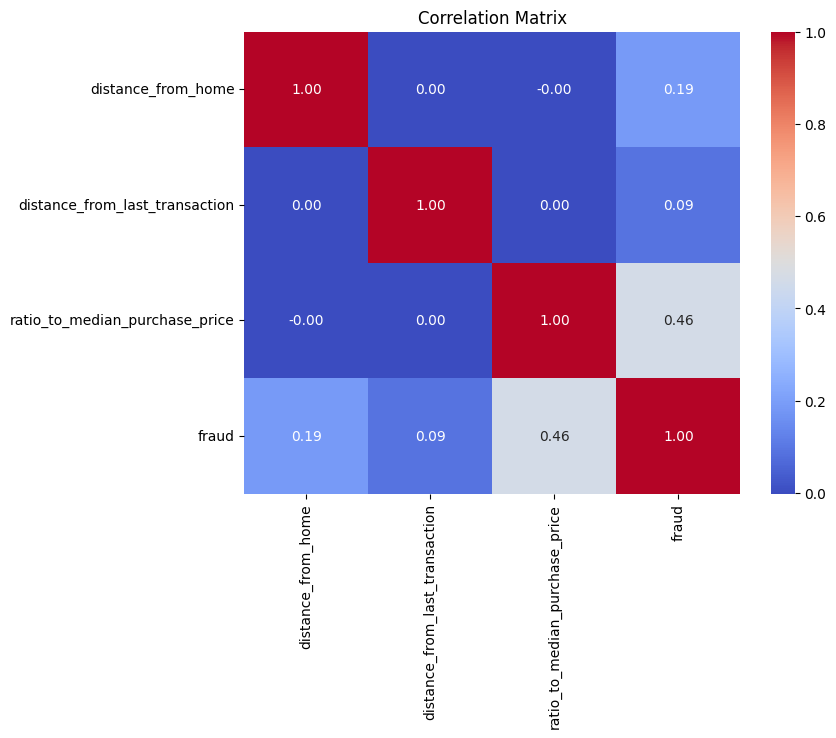

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

For online vs offline transactions, check how fraud rate changes as distance from home increases.

In [31]:
df.groupby(
    [
        'online_order',
        pd.cut(
            df['distance_from_last_transaction'],
            bins=[0, 1, 5, 10, 50, df['distance_from_last_transaction'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-696850631.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


online_order  distance_from_last_transaction
0.0           (0.0, 1.0]                        0.011854
              (1.0, 5.0]                        0.011434
              (5.0, 10.0]                       0.010848
              (10.0, 50.0]                      0.011687
              (50.0, 11851.105]                 0.134604
1.0           (0.0, 1.0]                        0.119383
              (1.0, 5.0]                        0.119078
              (5.0, 10.0]                       0.116922
              (10.0, 50.0]                      0.118896
              (50.0, 11851.105]                 0.663159
Name: fraud, dtype: float64


For online vs offline transactions, check how fraud rate changes as distance from last transaction increases.

In [32]:
df.groupby(
    [
        'used_chip',
        pd.cut(
            df['distance_from_home'],
            bins=[0, 10, 50, 100, 500, df['distance_from_home'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-771940218.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_chip  distance_from_home
0.0        (0.0, 10.0]           0.075375
           (10.0, 50.0]          0.068887
           (50.0, 100.0]         0.068154
           (100.0, 500.0]        0.629189
           (500.0, 10632.724]    0.608822
1.0        (0.0, 10.0]           0.063982
           (10.0, 50.0]          0.059419
           (50.0, 100.0]         0.060020
           (100.0, 500.0]        0.105472
           (500.0, 10632.724]    0.079295
Name: fraud, dtype: float64

chip usage reduces fraud even at higher distances from home

In [33]:
df.groupby(
    [
        'used_chip',
        pd.cut(
            df['distance_from_last_transaction'],
            bins=[0, 10, 50, 100, 500, df['distance_from_last_transaction'].max()]
        )
    ]
)['fraud'].mean()


/tmp/ipython-input-734406847.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_chip  distance_from_last_transaction
0.0        (0.0, 10.0]                       0.092208
           (10.0, 50.0]                      0.090326
           (50.0, 100.0]                     0.631385
           (100.0, 500.0]                    0.629757
           (500.0, 11851.105]                0.679348
1.0        (0.0, 10.0]                       0.061604
           (10.0, 50.0]                      0.065322
           (50.0, 100.0]                     0.191950
           (100.0, 500.0]                    0.211331
           (500.0, 11851.105]                0.200000
Name: fraud, dtype: float64

Bivariate analysis between distance from last transaction and chip usage shows that fraud risk increases sharply for large transaction gaps when the card chip is not used. However, when chip-based authentication is present, the increase in fraud probability is significantly mitigated, highlighting the importance of security mechanisms in reducing fraud during abnormal transaction patterns.



In [34]:
df.groupby(
    [
        'used_pin_number',
        pd.cut(
            df['ratio_to_median_purchase_price'],
            bins=[0, 0.5, 1, 2, 5, df['ratio_to_median_purchase_price'].max()]
        )
    ]
)['fraud'].mean()

/tmp/ipython-input-3388804314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(


used_pin_number  ratio_to_median_purchase_price
0.0              (0.0, 0.5]                        0.027955
                 (0.5, 1.0]                        0.027822
                 (1.0, 2.0]                        0.027633
                 (2.0, 5.0]                        0.139101
                 (5.0, 267.803]                    0.697810
1.0              (0.0, 0.5]                        0.000000
                 (0.5, 1.0]                        0.000000
                 (1.0, 2.0]                        0.000000
                 (2.0, 5.0]                        0.004410
                 (5.0, 267.803]                    0.025753
Name: fraud, dtype: float64

Key Insight

analysis between PIN usage and transaction amount deviation shows that fraud probability increases sharply for high-value transactions when a PIN is not used. However, when PIN authentication is present, fraud rates remain extremely low even for unusually large purchases.

Define features & target


In [35]:
X = df[
    [
        'distance_from_home',
        'distance_from_last_transaction',
        'ratio_to_median_purchase_price',
        'used_chip',
        'used_pin_number',
        'online_order',
        'repeat_retailer'
    ]
]

y = df['fraud']

In [36]:
X.isna().sum()

,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
used_chip,0
used_pin_number,0
online_order,0
repeat_retailer,0


In [37]:
binary_cols = ['used_chip', 'used_pin_number', 'online_order', 'repeat_retailer']

for col in binary_cols:
    X[col].fillna(X[col].mode()[0], inplace=True)


/tmp/ipython-input-1541844688.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mode()[0], inplace=True)
/tmp/ipython-input-1541844688.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(X[col].mode()[0], inplace=True)


In [38]:
X.isna().sum()


,0
distance_from_home,0
distance_from_last_transaction,0
ratio_to_median_purchase_price,0
used_chip,0
used_pin_number,0
online_order,0
repeat_retailer,0


In [39]:
y.isna().sum()


np.int64(0)

split dataset into test and tran (70:30 ) ratio

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


using logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [43]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

for test dataset

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.95908
ROC-AUC: 0.9671811057061819
[[271937   1842]
 [ 10434  15787]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273779
         1.0       0.90      0.60      0.72     26221

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.96    300000



In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]


for the train dataset

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Train ROC-AUC:", roc_auc_score(y_train, y_train_prob))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))

Train Accuracy: 0.9583871428571429
Train ROC-AUC: 0.9668007979954258
Train Confusion Matrix:
 [[634376   4442]
 [ 24687  36495]]
Train Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    638818
         1.0       0.89      0.60      0.71     61182

    accuracy                           0.96    700000
   macro avg       0.93      0.79      0.85    700000
weighted avg       0.96      0.96      0.95    700000



Finding out the Important feature columns

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

In [49]:
import pandas as pd
import numpy as np

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.coef_[0],
    'Absolute_Coefficient': np.abs(lr.coef_[0])
})

feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

,Feature,Coefficient,Absolute_Coefficient
4,used_pin_number,-4.139225,4.139225
5,online_order,3.170853,3.170853
2,ratio_to_median_purchase_price,2.413917,2.413917
0,distance_from_home,0.994089,0.994089
1,distance_from_last_transaction,0.653134,0.653134
3,used_chip,-0.501522,0.501522
6,repeat_retailer,-0.200391,0.200391


GridSearch for Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}


Initialize Logistic Regression

In [51]:
log_reg = LogisticRegression(max_iter=1000)

Apply GridSearchCV

In [52]:
grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)


Fit on TRAIN data only

In [53]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='roc_auc')

In [54]:
print("Best Parameters:", grid.best_params_)
print("Best ROC-AUC:", grid.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC-AUC: 0.9720208997991199


In [55]:
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]


In [56]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tuned))
print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Accuracy: 0.95252
ROC-AUC: 0.9716386341301411
[[271828   1951]
 [ 12293  13928]]
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97    273779
         1.0       0.88      0.53      0.66     26221

    accuracy                           0.95    300000
   macro avg       0.92      0.76      0.82    300000
weighted avg       0.95      0.95      0.95    300000

